# A Diabetes Detection Model
#### This model helps predict if a patient has diabetes or not. This uses [classification](https://www.ibm.com/think/topics/classification-machine-learning) type approach to solve the problem.

### Loading the Dataset
Tools: Pandas, NumPy<br>
Inspecting columns, checking for missing data.*italicized text*

In [21]:
import pandas as pd

# Load dataset and checking for missing data
df = pd.read_csv("diabetes.csv")
print(df.head())
print(df.info())
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

### Preprocessing the Data

Handle missing values, encode categorical data, normalize/standardize features.<br>
Tools: Pandas, NumPy, Scikit-learn.


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("Outcome", axis=1).values  # Features
y = df["Outcome"].values               # Labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### From Data to Tensor

Tools: Python

In [23]:
import torch

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

### Building Model
For classification Feedforward Neural Network([FNN](https://www.geeksforgeeks.org/deep-learning/feedforward-neural-network/)) has been used.

In [24]:
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(8, 16),  # 8 input features
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

model = SimpleNN()

### Defining Loss and Optimizer
[BCE](https://www.deepchecks.com/glossary/binary-cross-entropy/) has been used for loss log.

In [25]:
criterion = nn.BCELoss()  # Binary Cross Entropy for classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Training the Model

In [26]:
epochs = 100
loss_values = [] # Initialize list to store loss values
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    loss_values.append(loss.item()) # Store the loss value

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 10, Loss: 0.6626
Epoch 20, Loss: 0.6569
Epoch 30, Loss: 0.6515
Epoch 40, Loss: 0.6455
Epoch 50, Loss: 0.6382
Epoch 60, Loss: 0.6291
Epoch 70, Loss: 0.6178
Epoch 80, Loss: 0.6039
Epoch 90, Loss: 0.5871
Epoch 100, Loss: 0.5685


### Evaluation of the Model with Training Loss Visualization

In [27]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_class = (y_pred > 0.5).float()
    acc = accuracy_score(y_test_tensor, y_pred_class)
    print(f"Test Accuracy: {acc*100:.2f}%")

Test Accuracy: 75.97%


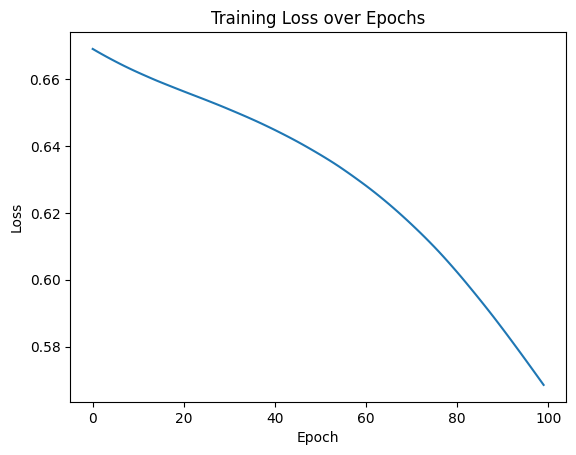

In [28]:
# Plot the loss curve
plt.plot(range(epochs), loss_values)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()